In [422]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
%matplotlib inline

In [423]:
car_df=pd.read_csv("used_car_price (1).csv")

In [424]:
car_df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,3.5,6,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,2.0,4,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,2.4,4,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,3.2,6,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,3.5,6,225,18,24,3880,115,197


In [425]:
car_df[car_df.duplicated()].sum() #checking dupluicated values

Make           0.0
Model          0.0
Type           0.0
Origin         0.0
DriveTrain     0.0
MSRP           0.0
EngineSize     0.0
Cylinders      0.0
Horsepower     0.0
MPG_City       0.0
MPG_Highway    0.0
Weight         0.0
Wheelbase      0.0
Length         0.0
dtype: float64

In [426]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    int64  
 6   EngineSize   428 non-null    float64
 7   Cylinders    428 non-null    int64  
 8   Horsepower   428 non-null    int64  
 9   MPG_City     428 non-null    int64  
 10  MPG_Highway  428 non-null    int64  
 11  Weight       428 non-null    int64  
 12  Wheelbase    428 non-null    int64  
 13  Length       428 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 46.9+ KB


In [427]:
car_df.shape

(428, 14)

In [428]:
car_df.isna().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

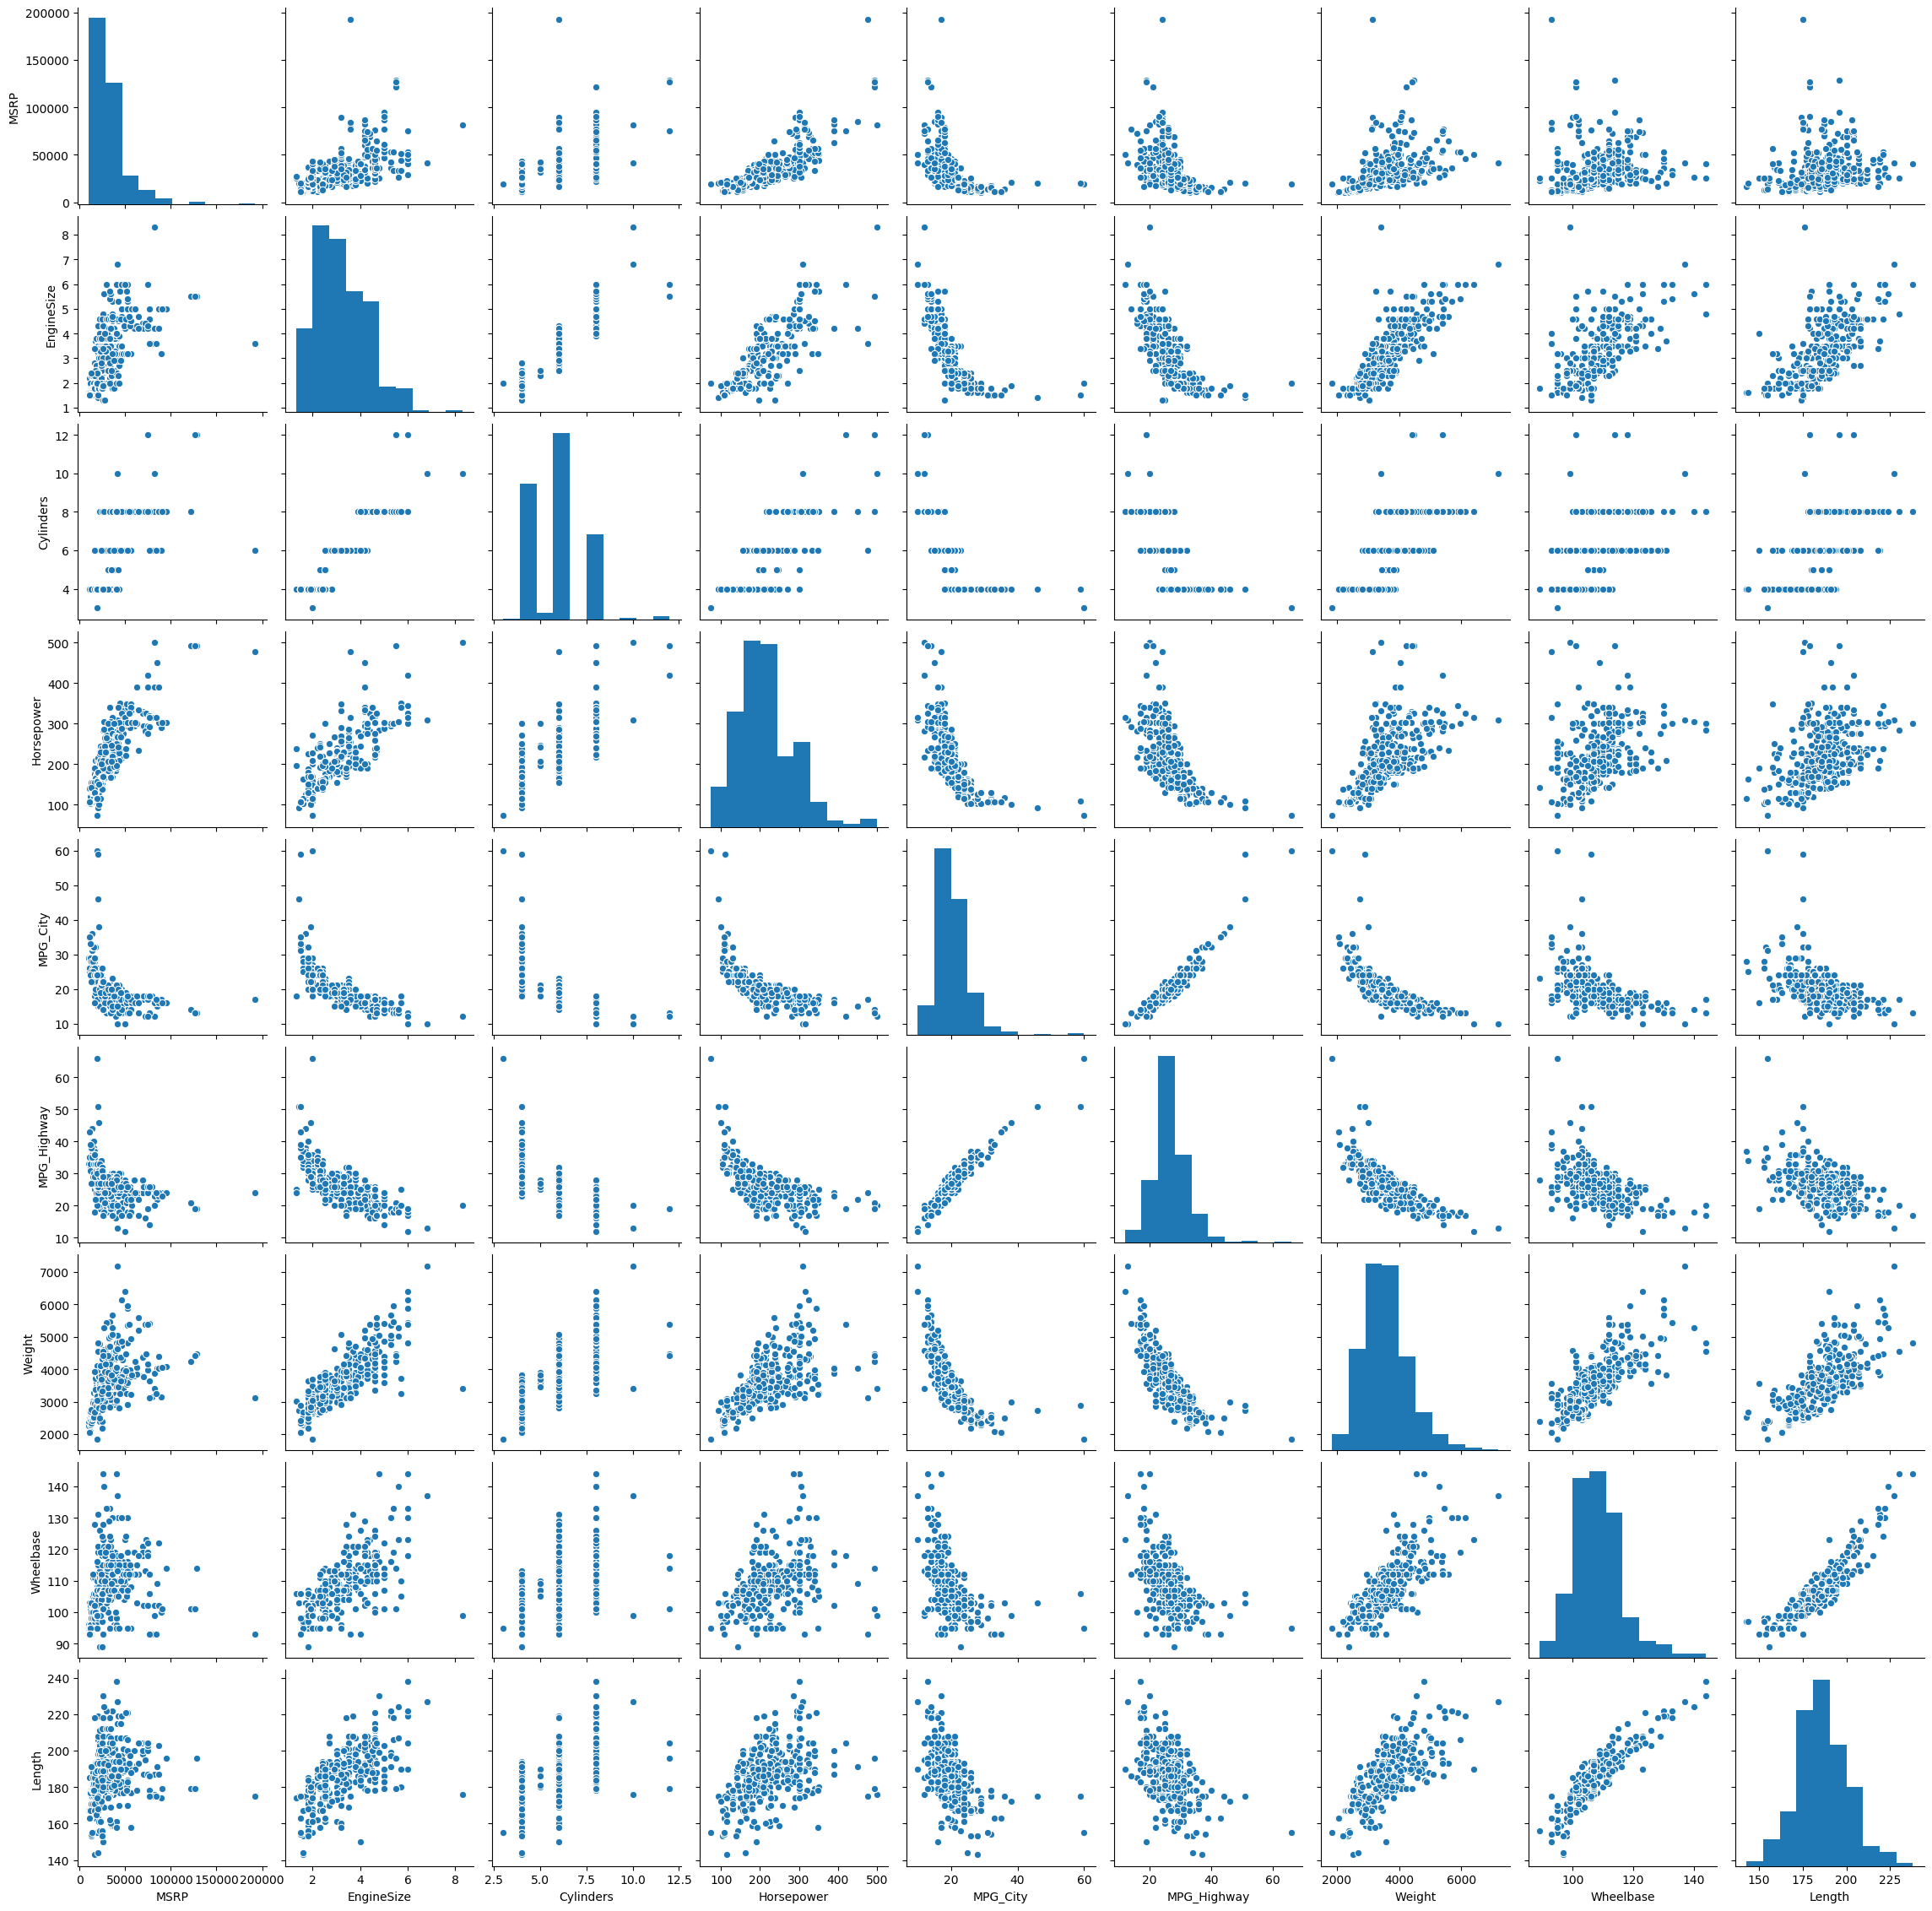

In [429]:
sns.pairplot(car_df)

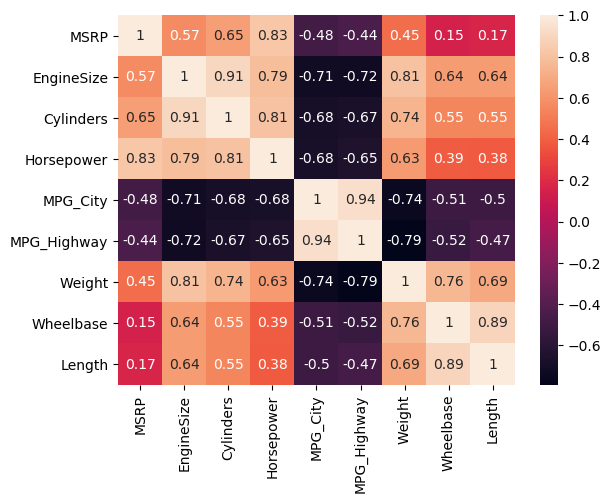

In [430]:
sns.heatmap(car_df.corr(),annot=True)

In [431]:
x_num=car_df.select_dtypes(include=np.number).columns.tolist()#numerical columns

In [432]:
x_num

['MSRP',
 'EngineSize',
 'Cylinders',
 'Horsepower',
 'MPG_City',
 'MPG_Highway',
 'Weight',
 'Wheelbase',
 'Length']

In [433]:
x_num=car_df[['EngineSize','Cylinders','Horsepower','MPG_City','MPG_Highway','Weight','Wheelbase','Length','MSRP']]

In [434]:
x_num

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,MSRP
0,3.5,6,265,17,23,4451,106,189,36945
1,2.0,4,200,24,31,2778,101,172,23820
2,2.4,4,200,22,29,3230,105,183,26990
3,3.2,6,270,20,28,3575,108,186,33195
4,3.5,6,225,18,24,3880,115,197,43755
...,...,...,...,...,...,...,...,...,...
423,2.4,5,197,21,28,3450,105,186,40565
424,2.3,5,242,20,26,3450,105,186,42565
425,2.9,6,268,19,26,3653,110,190,45210
426,1.9,4,170,22,29,2822,101,180,26135


In [435]:
x_cat=car_df.select_dtypes(include='object').columns.tolist() #categorical columns

In [436]:
x_cat

['Make', 'Model', 'Type', 'Origin', 'DriveTrain']

In [437]:
x_cat2=car_df[['Make','Model']]

In [438]:
x_cat2

,Make,Model
0,Acura,MDX
1,Acura,RSX Type S 2dr
2,Acura,TSX 4dr
3,Acura,TL 4dr
4,Acura,3.5 RL 4dr
...,...,...
423,Volvo,C70 LPT convertible 2dr
424,Volvo,C70 HPT convertible 2dr
425,Volvo,S80 T6 4dr
426,Volvo,V40


In [439]:
x_cat2=x_cat2.drop('Model',axis=1)

In [440]:
x_cat2

,Make
0,Acura
1,Acura
2,Acura
3,Acura
4,Acura
...,...
423,Volvo
424,Volvo
425,Volvo
426,Volvo


In [441]:
x_cat3=car_df[['Type', 'Origin', 'DriveTrain']]

In [442]:
x_cat3

,Type,Origin,DriveTrain
0,SUV,Asia,All
1,Sedan,Asia,Front
2,Sedan,Asia,Front
3,Sedan,Asia,Front
4,Sedan,Asia,Front
...,...,...,...
423,Sedan,Europe,Front
424,Sedan,Europe,Front
425,Sedan,Europe,Front
426,Wagon,Europe,Front


# Training XGB Boost In AWS

In [443]:
#one hot encoding for the categorical columns 
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat4 = onehotencoder.fit_transform(x_cat3).toarray()
X_cat4
X_cat4.shape

(428, 12)

In [444]:
X_cat4 = pd.DataFrame(X_cat4)
X_cat4.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [445]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
x_cat5=le.fit_transform(x_cat2)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [446]:
x_cat5

array([ 0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13,
       14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 19, 19, 19,
       19, 19, 19, 19, 19

In [447]:
x_cat5=pd.DataFrame(x_cat5)
x_cat5

,0
0,0
1,0
2,0
3,0
4,0
...,...
423,37
424,37
425,37
426,37


In [448]:
x_num1=x_num.drop('Weight',axis=1)
Weight1=pd.DataFrame(x_num["Weight"])
Weight1

,Weight
0,4451
1,2778
2,3230
3,3575
4,3880
...,...
423,3450
424,3450
425,3653
426,2822


In [449]:
#Scaling the weight because it will be very dominating feature
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit_transform(Weight1)

In [450]:
scaler
weight_scaled=pd.DataFrame(scaler)
weight_scaled
weight_scaled.rename(columns={0:'Weights'},inplace=True)

In [451]:
weight_scaled

,Weights
0,1.151631
1,-1.055214
2,-0.458983
3,-0.003896
4,0.398428
...,...
423,-0.168782
424,-0.168782
425,0.098994
426,-0.997173


In [452]:
X_all=pd.concat([weight_scaled,X_cat4,x_cat5,x_num1],axis=1)

In [453]:
X_all

,Weights,0,1,2,3,4,5,6,7,8,...,11,0,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Wheelbase,Length,MSRP
0,1.151631,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0,3.5,6,265,17,23,106,189,36945
1,-1.055214,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0,2.0,4,200,24,31,101,172,23820
2,-0.458983,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0,2.4,4,200,22,29,105,183,26990
3,-0.003896,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0,3.2,6,270,20,28,108,186,33195
4,0.398428,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0,3.5,6,225,18,24,115,197,43755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,-0.168782,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,37,2.4,5,197,21,28,105,186,40565
424,-0.168782,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,37,2.3,5,242,20,26,105,186,42565
425,0.098994,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,37,2.9,6,268,19,26,110,190,45210
426,-0.997173,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,37,1.9,4,170,22,29,101,180,26135


In [454]:
X = X_all.iloc[:, :-1].values
y = X_all.iloc[:, -1:].values

In [455]:
X.shape

(428, 21)

# Splitting the dataset

In [456]:
# spliting the data into training, testing and validation sets
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)

In [457]:
# Convert the array into dataframe in a way that target variable is set as the first column and followed by feature columns
# This is because sagemaker built-in algorithm expects the data in this format.
 
train_data = pd.DataFrame({'Target': y_train[:,0]})
for i in range(X_train.shape[1]):
    train_data[i] = X_train[:,i]

In [458]:
train_data.head()

,Target,0,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,20
0,22395,-0.133167,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,28.0,3.8,6.0,200.0,20.0,30.0,111.0,198.0
1,94820,0.668842,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,23.0,5.0,8.0,302.0,16.0,24.0,114.0,196.0
2,27145,-0.109423,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,33.0,2.5,4.0,165.0,20.0,27.0,104.0,184.0
3,50670,0.511870,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,23.0,3.2,6.0,221.0,19.0,27.0,112.0,190.0
4,12269,-1.156784,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,34.0,2.0,4.0,119.0,24.0,31.0,102.0,177.0


In [459]:
val_data = pd.DataFrame({'Target':y_val[:,0]})
for i in range(X_val.shape[1]):
    val_data[i] = X_val[:,i]

In [460]:
val_data.head()

,Target,0,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,20
0,16722,-1.032789,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,25.0,2.0,4.0,120.0,25.0,31.0,102.0,181.0
1,48040,0.325878,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,4.2,8.0,340.0,14.0,20.0,104.0,179.0
2,49090,0.472297,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,4.2,8.0,340.0,15.0,21.0,104.0,179.0
3,22290,-0.106785,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,8.0,3.0,6.0,155.0,19.0,26.0,109.0,198.0
4,38380,0.993339,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,6.0,3.8,6.0,215.0,18.0,25.0,119.0,201.0


In [461]:
# save train_data and validation_data as csv files.
 
train_data.to_csv('train.csv', header = False, index = False)
val_data.to_csv('validation.csv', header = False, index = False)

In [462]:
# Boto3 is the Amazon Web Services (AWS) Software Development Kit (SDK) for Python
# Boto3 allows Python developer to write software that makes use of services like Amazon S3 and Amazon EC2
 
import sagemaker
import boto3
from sagemaker import Session
 
# Let's create a Sagemaker session
sagemaker_session = sagemaker.Session()
bucket = Session().default_bucket() 
prefix = 'XGBoost-Regressor'
key = 'XGBoost-Regressor'
#Roles give learning and hosting access to the data
#This is specified while opening the sagemakers instance in "Create an IAM role"
role = sagemaker.get_execution_role()

In [463]:
# read the data from csv file and then upload the data to s3 bucket
import os
with open('train.csv','rb') as f:
    # The following code uploads the data into S3 bucket to be accessed later for training
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(f)
 
# Let's print out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://sagemaker-us-east-1-555918697305/XGBoost-Regressor/train/XGBoost-Regressor


In [464]:
# read the data from csv file and then upload the data to s3 bucket
 
with open('validation.csv','rb') as f:
    # The following code uploads the data into S3 bucket to be accessed later for training
 
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'validation', key)).upload_fileobj(f)
# Let's print out the validation data location in s3
s3_validation_data = 's3://{}/{}/validation/{}'.format(bucket, prefix, key)
print('uploaded validation data location: {}'.format(s3_validation_data))


uploaded validation data location: s3://sagemaker-us-east-1-555918697305/XGBoost-Regressor/validation/XGBoost-Regressor


In [465]:
# creates output placeholder in S3 bucket to store the output
 
output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('training artifacts will be uploaded to: {}'.format(output_location))

training artifacts will be uploaded to: s3://sagemaker-us-east-1-555918697305/XGBoost-Regressor/output


In [466]:
container = sagemaker.image_uris.retrieve("xgboost", boto3.Session().region_name, version='1.0-1')

In [475]:
bike_Xgboost_regressor = sagemaker.estimator.Estimator(container,
                                       role, 
                                       instance_count = 1, 
                                       instance_type = 'ml.m5.xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session)
 
# We can tune the hyper-parameters to improve the performance of the model
 
bike_Xgboost_regressor.set_hyperparameters(max_depth = 2,
                           objective = 'reg:squarederror',
                           colsample_bytree = 0.3,
                           alpha = 0.1,
                           eta = 0.1,
                           num_round = 100)

In [476]:
# Creating "train", "validation" channels to feed in the model
# Source: https://docs.aws.amazon.com/sagemaker/latest/dg/sagemaker-algo-docker-registry-paths.html
 
train_input = sagemaker.session.TrainingInput(s3_data = s3_train_data, content_type = 'csv',s3_data_type = 'S3Prefix')
valid_input = sagemaker.session.TrainingInput(s3_data = s3_validation_data, content_type = 'csv',s3_data_type = 'S3Prefix')
 

data_channels = {'train': train_input,'validation': valid_input}
 

bike_Xgboost_regressor.fit(data_channels)

2022-12-03 08:50:14 Starting - Starting the training job...
2022-12-03 08:50:31 Starting - Preparing the instances for trainingProfilerReport-1670057414: InProgress
......
2022-12-03 08:51:37 Downloading - Downloading input data...
2022-12-03 08:52:05 Training - Downloading the training image...
2022-12-03 08:52:40 Training - Training image download completed. Training in progress..INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value reg:squarederror to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
[08:52:43] 363x21 matrix with 7623 entries loaded from /opt/ml/input/data/train?format=csv&labe

In [478]:
#Deploy the model
predictor = bike_Xgboost_regressor.deploy(initial_instance_count = 1, instance_type = "ml.m5.xlarge")

-----!

In [479]:
predictor.endpoint_name

'sagemaker-xgboost-2022-12-03-08-53-39-604'

In [480]:
from sagemaker.predictor import csv_serializer, json_deserializer
predictor.serializer = csv_serializer

In [481]:
predictions = predictor.predict(X_test)
predictions

The csv_serializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


b'30996.37890625,14930.072265625,23485.427734375,25500.56640625,40532.421875,23828.93359375,27200.3046875,36309.01171875,60562.5078125,26151.63671875,14358.1708984375,24178.09765625,20619.380859375,25387.048828125,28286.234375,38341.16796875,29316.271484375,21861.865234375,26535.064453125,38663.28125,33451.23828125,41349.2734375,14539.3154296875,23011.556640625,36198.25390625,39599.09375,15951.55859375,29427.41015625,13523.859375,13830.6357421875,26626.048828125,30414.154296875'

In [482]:
# custom code to convert the values in bytes format to array
 
def bytes_2_array(x):

    # makes entire prediction as string and splits based on ','
    l = str(x).split(',')

    # Since the first element contains unwanted characters like (b,',') we remove them
    l[0] = l[0][2:]
    # same thing as above remove the unwanted last character (')
    l[-1] = l[-1][:-1]

    # iterating through the list of strings and converting them into float type
    for i in range(len(l)):
        l[i] = float(l[i])

    # converting the list into array
    l = np.array(l).astype('float32')

    # reshape one-dimensional array to two-dimensional array
    return l.reshape(-1,1)


In [483]:
predicted_values = bytes_2_array(predictions)

In [484]:
predicted_values.shape

(32, 1)

In [485]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, predicted_values)),'.3f'))
MSE = mean_squared_error(y_test, predicted_values)
MAE = mean_absolute_error(y_test, predicted_values)
r2 = r2_score(y_test, predicted_values)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
 
print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 4145.963 
MSE = 17189005.277835697 
MAE = 3250.793243408203 
R2 = 0.8581700471750324 
Adjusted R2 = 0.5603271462426005


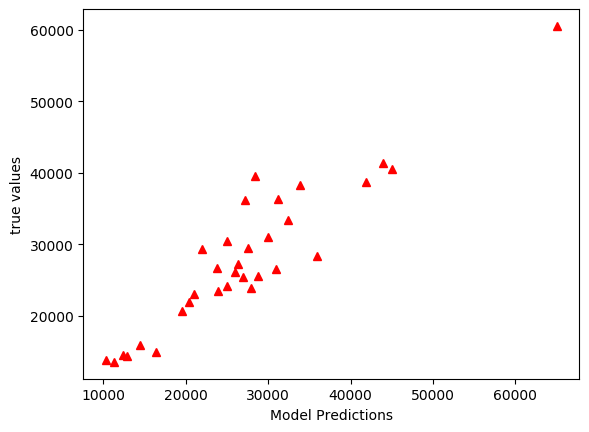

In [486]:
plt.plot(y_test,predicted_values,'^',color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('true values')
plt.show()

# Hyperparameter tuning

In [487]:
container = sagemaker.image_uris.retrieve("xgboost", boto3.Session().region_name, version='1.0-1')
 
Xgboost_regressor = sagemaker.estimator.Estimator(container,
                                       role, 
                                       instance_count = 1, 
                                       instance_type = 'ml.m4.xlarge',
                                       input_mode = 'File',
                                       use_spot_instances = True, 
                                       max_run = 300, # Timeout in seconds for training (default: 24 * 60 * 60). After this amount of time Amazon SageMaker terminates the job regardless of its current status.
                                       max_wait = 600, # Timeout in seconds waiting for spot training job (default: None). After this amount of time Amazon SageMaker will stop waiting for managed spot training job to complete (default: None).
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session)
 
Xgboost_regressor.set_hyperparameters(objective = 'reg:squarederror',
                                      early_stopping_rounds = 10,
                                      num_round = 150)

In [488]:
# creating hyperparameter ranges within which model can be tuned
 
from sagemaker.tuner import IntegerParameter, CategoricalParameter, ContinuousParameter, HyperparameterTuner
 
hyperparameter_ranges = {'eta': ContinuousParameter(0.1, 0.9), # Note that max value for eta is 1
                        'min_child_weight': ContinuousParameter(5, 10),#3,10
                        'alpha': ContinuousParameter(0.1, 0.4),
                        'max_depth': IntegerParameter(8, 15)}

In [489]:
# Creating a hyperparameters tuning job
tuner = HyperparameterTuner(Xgboost_regressor,
                            objective_metric_name = 'validation:rmse',
                            hyperparameter_ranges = hyperparameter_ranges,
                            objective_type = 'Minimize',
                            max_jobs = 5,
                            max_parallel_jobs = 1)

In [490]:
# This process will take some time! navigate to Hyperparameters Tuning Jobs in the AWS SageMaker
tuner.fit(data_channels)

No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config
No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config


.............................................................................................................................................................................................................................................................................!


In [491]:
# Once the tuning job is complete, you can now view the analytics on the tuning job
from sagemaker.analytics import HyperparameterTuningJobAnalytics
summary = HyperparameterTuningJobAnalytics(sagemaker_session = sagemaker_session,
                                       hyperparameter_tuning_job_name = tuner.latest_tuning_job.name).dataframe()

In [492]:
# Deploy the model
xgb_endpoint = tuner.deploy(initial_instance_count = 1, instance_type = "ml.m5.xlarge")


2022-12-03 09:16:52 Starting - Preparing the instances for training
2022-12-03 09:16:52 Downloading - Downloading input data
2022-12-03 09:16:52 Training - Training image download completed. Training in progress.
2022-12-03 09:16:52 Uploading - Uploading generated training model
2022-12-03 09:16:52 Completed - Training job completed
-----!

In [493]:
predictions = xgb_endpoint.predict(X_test)
predictions

ParamValidationError: Parameter validation failed:
Invalid type for parameter Body, value: [[-1.97802474e-01  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  1.50000000e+01  2.50000000e+00  6.00000000e+00
   1.92000000e+02  1.80000000e+01  2.60000000e+01  1.07000000e+02
   1.84000000e+02]
 [-1.26758778e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  5.00000000e+00  2.20000000e+00  4.00000000e+00
   1.40000000e+02  2.60000000e+01  3.70000000e+01  1.04000000e+02
   1.83000000e+02]
 [-1.95164286e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  3.30000000e+01  2.50000000e+00  4.00000000e+00
   1.65000000e+02  2.10000000e+01  2.80000000e+01  1.04000000e+02
   1.87000000e+02]
 [ 4.88126454e-01  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  2.70000000e+01  3.40000000e+00  6.00000000e+00
   1.85000000e+02  1.90000000e+01  2.60000000e+01  1.20000000e+02
   2.01000000e+02]
 [-1.39762334e-01  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  2.00000000e+00  3.00000000e+00  6.00000000e+00
   2.25000000e+02  2.00000000e+01  3.00000000e+01  1.14000000e+02
   1.91000000e+02]
 [ 2.79709588e-01  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  1.60000000e+01  4.00000000e+00  6.00000000e+00
   1.95000000e+02  1.60000000e+01  2.10000000e+01  1.06000000e+02
   1.81000000e+02]
 [ 1.35477127e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  5.00000000e+00  4.30000000e+00  6.00000000e+00
   1.90000000e+02  1.40000000e+01  1.70000000e+01  1.11000000e+02
   1.90000000e+02]
 [ 1.44710786e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  6.00000000e+00  3.50000000e+00  6.00000000e+00
   2.50000000e+02  1.70000000e+01  2.30000000e+01  1.16000000e+02
   1.99000000e+02]
 [ 2.13171769e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  3.60000000e+01  4.20000000e+00  8.00000000e+00
   3.35000000e+02  1.60000000e+01  2.20000000e+01  1.18000000e+02
   2.04000000e+02]
 [-2.84862684e-01  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  3.50000000e+01  3.00000000e+00  6.00000000e+00
   2.10000000e+02  2.10000000e+01  2.90000000e+01  1.07000000e+02
   1.89000000e+02]
 [-1.18976123e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  3.40000000e+01  2.30000000e+00  4.00000000e+00
   1.55000000e+02  2.50000000e+01  3.10000000e+01  9.80000000e+01
   1.71000000e+02]
 [-1.34485958e-01  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  5.00000000e+00  3.80000000e+00  6.00000000e+00
   2.00000000e+02  2.00000000e+01  3.00000000e+01  1.11000000e+02
   2.00000000e+02]
 [ 4.67020949e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  2.60000000e+01  3.30000000e+00  6.00000000e+00
   1.80000000e+02  1.70000000e+01  2.00000000e+01  1.16000000e+02
   1.91000000e+02]
 [-3.74561083e-01  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  1.00000000e+01  3.00000000e+00  6.00000000e+00
   2.40000000e+02  2.10000000e+01  3.00000000e+01  1.05000000e+02
   1.88000000e+02]
 [ 7.92072855e-02  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  1.00000000e+00  1.80000000e+00  4.00000000e+00
   1.70000000e+02  2.30000000e+01  3.00000000e+01  1.05000000e+02
   1.80000000e+02]
 [-8.52073144e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  2.00000000e+00  2.50000000e+00  6.00000000e+00
   1.84000000e+02  2.00000000e+01  2.80000000e+01  9.80000000e+01
   1.61000000e+02]
 [ 1.59616549e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  8.00000000e+00  4.60000000e+00  8.00000000e+00
   2.31000000e+02  1.50000000e+01  1.90000000e+01  1.26000000e+02
   2.11000000e+02]
 [-3.86432929e-01  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  3.30000000e+01  2.50000000e+00  4.00000000e+00
   1.65000000e+02  2.10000000e+01  2.80000000e+01  1.04000000e+02
   1.84000000e+02]
 [-1.83292439e-01  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  3.50000000e+01  3.00000000e+00  6.00000000e+00
   2.10000000e+02  2.10000000e+01  2.90000000e+01  1.07000000e+02
   1.92000000e+02]
 [ 1.04346507e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  2.00000000e+01  4.60000000e+00  8.00000000e+00
   2.39000000e+02  1.70000000e+01  2.50000000e+01  1.18000000e+02
   2.15000000e+02]
 [-3.86432929e-01  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  1.90000000e+01  3.00000000e+00  6.00000000e+00
   2.15000000e+02  1.80000000e+01  2.40000000e+01  1.05000000e+02
   1.77000000e+02]
 [ 2.62561365e-01  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  1.50000000e+01  3.00000000e+00  6.00000000e+00
   2.35000000e+02  1.80000000e+01  2.60000000e+01  1.15000000e+02
   1.92000000e+02]
 [-1.20954764e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  1.70000000e+01  1.80000000e+00  4.00000000e+00
   1.24000000e+02  2.40000000e+01  3.20000000e+01  1.01000000e+02
   1.78000000e+02]
 [-7.58417464e-01  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  3.60000000e+01  1.90000000e+00  4.00000000e+00
   1.00000000e+02  3.80000000e+01  4.60000000e+01  9.90000000e+01
   1.72000000e+02]
 [-7.24121017e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  2.20000000e+01  1.30000000e+00  4.00000000e+00
   2.38000000e+02  1.80000000e+01  2.40000000e+01  1.06000000e+02
   1.74000000e+02]
 [-1.95164286e-01  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  2.30000000e+01  3.20000000e+00  6.00000000e+00
   2.15000000e+02  1.90000000e+01  2.60000000e+01  1.07000000e+02
   1.78000000e+02]
 [-7.25440111e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  8.00000000e+00  2.30000000e+00  4.00000000e+00
   1.43000000e+02  2.40000000e+01  2.90000000e+01  1.11000000e+02
   1.88000000e+02]
 [-1.38443240e-01  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  2.60000000e+01  3.50000000e+00  6.00000000e+00
   2.65000000e+02  2.00000000e+01  2.80000000e+01  1.11000000e+02
   1.94000000e+02]
 [-2.00891866e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  3.50000000e+01  1.50000000e+00  4.00000000e+00
   1.08000000e+02  3.50000000e+01  4.30000000e+01  9.30000000e+01
   1.63000000e+02]
 [-1.54987392e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  1.70000000e+01  1.60000000e+00  4.00000000e+00
   1.04000000e+02  2.60000000e+01  3.30000000e+01  9.50000000e+01
   1.67000000e+02]
 [-1.05521363e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  2.00000000e+00  4.00000000e+00
   2.00000000e+02  2.40000000e+01  3.10000000e+01  1.01000000e+02
   1.72000000e+02]
 [-6.50251748e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  3.30000000e+01  2.00000000e+00  4.00000000e+00
   2.27000000e+02  2.00000000e+01  2.70000000e+01  9.90000000e+01
   1.74000000e+02]], type: <class 'numpy.ndarray'>, valid types: <class 'bytes'>, <class 'bytearray'>, file-like object

In [ ]:
predicted_values = bytes_2_array(predictions)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, predicted_values)),'.3f'))
MSE = mean_squared_error(y_test, predicted_values)
MAE = mean_absolute_error(y_test, predicted_values)
r2 = r2_score(y_test, predicted_values)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
 
print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 